**Data Science Intern - LetsGrowMore**

Author: Divyanshu Agrawal

Task 4: 
Stock Market Prediction and Forecasting

OUTLINES:

-Import libraries and Datasets
-Data cleaning and preparation 
-Feature Engineering 
-Model building 
-Model evaluation

**Importing Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

**Loading & Analyzing Stocks Data**

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv', 
                 infer_datetime_format=True, parse_dates=['Date'])


In [3]:
data = data.set_index(['Date'])

In [4]:
data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
print(data.index.unique().tolist()[0])
print(data.index.unique().tolist()[-1])

2018-09-28 00:00:00
2010-07-21 00:00:00


**Given dataset has stock prices from year 2010-2018**

In [6]:
data.shape

(2035, 7)

In [7]:
# Checking null values
data.isnull().sum()

Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2035 entries, 2018-09-28 to 2010-07-21
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  2035 non-null   float64
 1   High                  2035 non-null   float64
 2   Low                   2035 non-null   float64
 3   Last                  2035 non-null   float64
 4   Close                 2035 non-null   float64
 5   Total Trade Quantity  2035 non-null   int64  
 6   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 191.7 KB


**Stock Closing Prices over the year (2010-2018)**

Text(0.5, 1.0, 'Stock Price Over the Years')

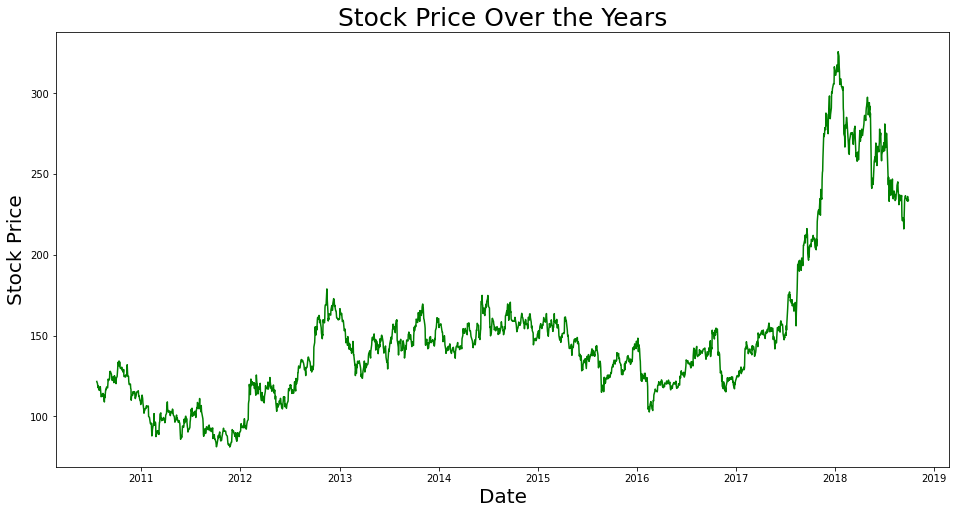

In [42]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Close Price history',color='g')
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=20)
plt.title('Stock Price Over the Years',size=25)

In [10]:
df=data.reset_index()['Close']

In [11]:
df

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [12]:
df1=df.copy()

**Feature Scaling**

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [14]:
df

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

**Splitting dataset into train and test split**

In [15]:
training_size=int(len(df)*0.65)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:]

In [16]:
training_size,test_size


(1322, 713)

**Data Sequencing**

In [17]:
# convert an array of values into a dataset matrix with 100 time-steps and 1 output
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1): 
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [18]:
# Making training and testing data with 100 time-steps and 1 output
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape)
print(y_train.shape)


(1221, 100)
(1221,)


In [20]:
print(X_test.shape)
print(ytest.shape)


(612, 100)
(612,)


**Reshaping our data (3D)**

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
print(X_train.shape)
print(X_test.shape)

(1221, 100, 1)
(612, 100, 1)


**Builing the LSTM Model**

In [23]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2022-02-25 20:47:29.552047: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 20:47:29.552086: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


**LSTM has three gates:**

-Input gate

-Forget gate

-Output gate

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) # Lstm Layer with Input layer(lstm layer-1)
model.add(LSTM(50,return_sequences=True)) # Lstm Layer-2
model.add(LSTM(50)) # Lstm Layer-3
model.add(Dense(1)) # output layer
model.compile(loss='mean_squared_error',optimizer='adam')

2022-02-25 20:47:33.096651: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-25 20:47:33.096697: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-25 20:47:33.096723: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hpdiv): /proc/driver/nvidia/version does not exist
2022-02-25 20:47:33.097027: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
20/20 [==============================] - 12s 269ms/step - loss: 0.0329 - val_loss: 0.0040
Epoch 2/100
20/20 [==============================] - 4s 187ms/step - loss: 0.0037 - val_loss: 0.0018
Epoch 3/100
20/20 [==============================] - 4s 198ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 4/100
20/20 [==============================] - 4s 190ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 5/100
20/20 [==============================] - 4s 191ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 6/100
20/20 [==============================] - 4s 193ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 7/100
20/20 [==============================] - 4s 198ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 8/100
20/20 [==============================] - 4s 183ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 9/100
20/20 [==============================] - 4s 196ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 10/100
20/20 [==============================] - 4s 183ms/step - loss: 0.0011 - val_l

20/20 [==============================] - 4s 181ms/step - loss: 3.6162e-04 - val_loss: 2.7378e-04
Epoch 77/100
20/20 [==============================] - 4s 181ms/step - loss: 4.0070e-04 - val_loss: 2.6131e-04
Epoch 78/100
20/20 [==============================] - 4s 183ms/step - loss: 3.5163e-04 - val_loss: 2.7821e-04
Epoch 79/100
20/20 [==============================] - 4s 182ms/step - loss: 3.1065e-04 - val_loss: 3.0456e-04
Epoch 80/100
20/20 [==============================] - 4s 182ms/step - loss: 3.2489e-04 - val_loss: 2.8853e-04
Epoch 81/100
20/20 [==============================] - 4s 188ms/step - loss: 2.8980e-04 - val_loss: 2.6464e-04
Epoch 82/100
20/20 [==============================] - 4s 200ms/step - loss: 2.9045e-04 - val_loss: 2.3725e-04
Epoch 83/100
20/20 [==============================] - 4s 198ms/step - loss: 2.8753e-04 - val_loss: 2.3707e-04
Epoch 84/100
20/20 [==============================] - 4s 183ms/step - loss: 3.0368e-04 - val_loss: 4.1501e-04
Epoch 85/100
20/20 [===

In [27]:
import tensorflow as tf

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [28]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [29]:
print(train_predict.shape)
print(test_predict.shape)

(1221, 1)
(612, 1)


In [30]:
#Calculating r^2 value for training data
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


169.76677003930365

In [31]:
# Calculating r^2 value for test data
math.sqrt(mean_squared_error(ytest,test_predict))

117.23736376122794

**Visualizing Stock Price Prediction for training and testing data**

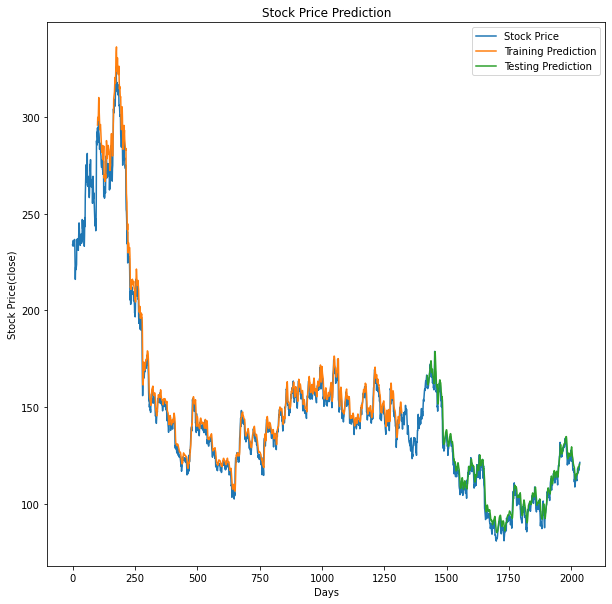

In [32]:
plt.figure(figsize=(10, 10))

look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df), label = 'Stock Price')
plt.plot(trainPredictPlot, label = 'Training Prediction')
plt.plot(testPredictPlot, label = 'Testing Prediction')

plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price(close)')
plt.legend()
plt.show()

**Forecast on future 30 days
Collect previous 100 days data**

In [33]:
len(test_data)


713

In [34]:
x_input=test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [35]:
# Contains previous 100 days data 
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

 **Let's predict for coming 30 days from previous data**

In [36]:
n_steps = len(temp_input)
for i in range(30):
    input_ = temp_input[i:]
    input_ = np.array(input_).reshape(1, n_steps, 1)
    output = model.predict(input_)[0][0]
    temp_input.append(output)

In [37]:
len(temp_input)


130

**Length is 130 as it contains data of previous 100 days and 30 predicted days**

In [38]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [39]:
len(df)

2035

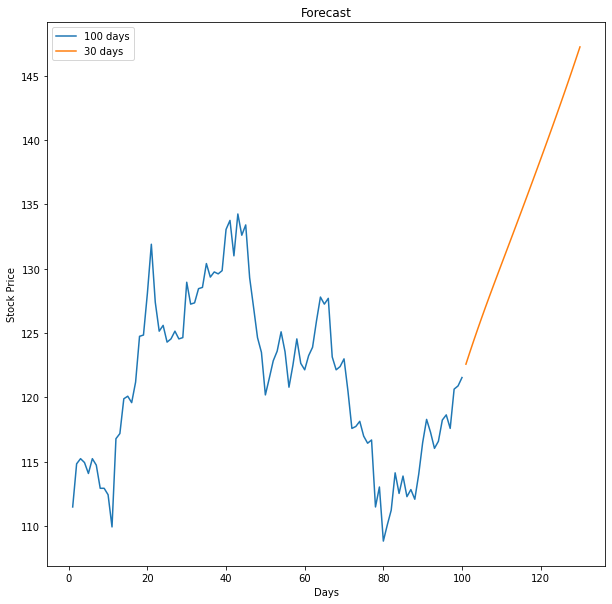

In [41]:
# Plotting Stock Price for next 30 days prediction
plt.figure(figsize = (10,10))
plt.plot(day_new, scaler.inverse_transform(np.array(df[1935:]).reshape(-1,1)), label='100 days')
plt.plot(day_pred, scaler.inverse_transform(np.array(temp_input[100:]).reshape(-1,1)), label='30 days')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Forecast')
plt.legend()
plt.show()

# **Conclusion:**
- Stock price between the years 2017 to 2018 are increasing. 
- But it decreases till september.
- Then again there is sudden increase in closing prices in october.
- We successfully completed the stock market prediction and forecasting using stacked LSTM model.